In [1]:
import findspark
findspark.init()
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession
from pyspark import SparkContext as sc
from pyspark.sql.functions import col
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('myproj').getOrCreate()
df= spark.read.csv('C:\\Users\\Lenovo\\Downloads\\application_train.csv',inferSchema=True,header=True)
df.printSchema()

root
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_EMP_PHONE: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_CONT_MOBILE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- CNT_FAM_MEMBERS: integer (nullable = true)
 |-- REGION_RATING_CLIENT: in

In [7]:
df.columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'ORGANIZATION_TYPE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12']

In [8]:
print("The dataset has %d rows." % df.count())

The dataset has 307511 rows.


In [9]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
TARGET,307511,0.08072881945686496,0.27241864564839385,0,1
NAME_CONTRACT_TYPE,307511,None,None,Cash loans,Revolving loans
CODE_GENDER,307511,None,None,F,XNA
FLAG_OWN_CAR,307511,None,None,N,Y
FLAG_OWN_REALTY,307511,None,None,N,Y
CNT_CHILDREN,307511,0.4170517477423572,0.7221213844376254,0,19
AMT_INCOME_TOTAL,307511,168797.9192969845,237123.14627885542,25650.0,1.17E8
AMT_CREDIT,307511,599025.9997057016,402490.7769958553,45000.0,4050000.0
AMT_ANNUITY,307499,27108.573909183444,14493.737315118322,1615.5,258025.5


In [10]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int32  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int32  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [11]:
df.toPandas().isnull().sum()

TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
ORGANIZATION_TYPE               0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_3                 0
FLAG_DOCUMENT_4                 0
FLAG_DOCUMENT_

In [12]:
df = df.fillna({'AMT_ANNUITY':0})

In [13]:
df = df.fillna({'CNT_FAM_MEMBERS':0})

In [14]:
df.toPandas().isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUM

In [15]:
#the shape and size of the daaset
print(df.toPandas().shape)
print(df.toPandas().size)

(307511, 37)
11377907


In [16]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
TARGET,307511,0.08072881945686496,0.27241864564839385,0,1
CNT_CHILDREN,307511,0.4170517477423572,0.7221213844376254,0,19
DAYS_BIRTH,307511,-16036.995066843137,4363.98863178556,-25229,-7489
DAYS_EMPLOYED,307511,63815.04590404896,141275.76651872744,-17912,365243
FLAG_MOBIL,307511,0.9999967480838083,0.001803307015351487,0,1
FLAG_EMP_PHONE,307511,0.8198893698111612,0.384280198938764,0,1
FLAG_WORK_PHONE,307511,0.1993684778755882,0.39952622815022654,0,1
FLAG_CONT_MOBILE,307511,0.9981334001060125,0.04316389414243245,0,1
FLAG_PHONE,307511,0.28106636835755466,0.44952054685675824,0,1


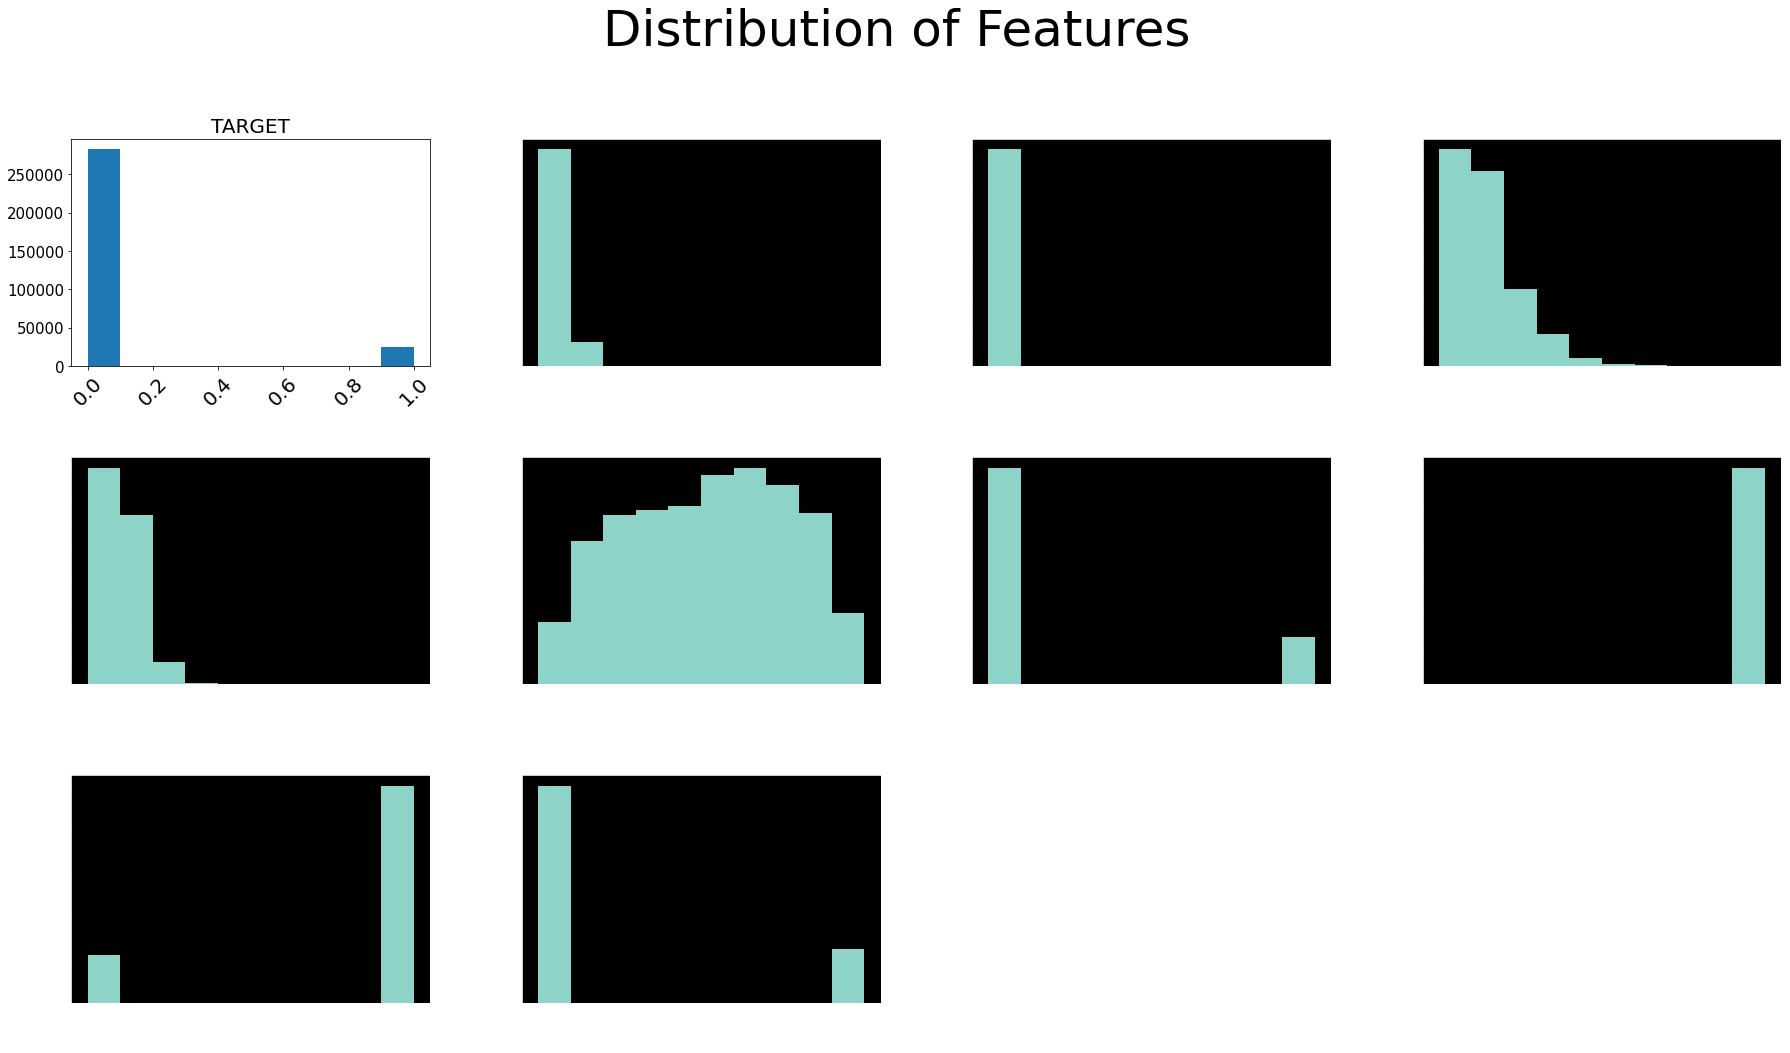

In [17]:
from matplotlib import cm
fig = plt.figure(figsize=(25,15)) ## Plot Size 
st = fig.suptitle("Distribution of Features", fontsize=50,
                  verticalalignment='center') # Plot Main Title 

for col,num in zip(df.toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3,4,num)
    ax.hist(df.toPandas()[col])
    plt.style.use('dark_background') 
    plt.grid(False)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace = 0.4)
plt.show()

In [18]:
numeric_features = [t[0] for t in df.dtypes if t[1] != 'string']
numeric_features_df=df.select(numeric_features)
numeric_features_df.toPandas().head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12
0,1,0,202500.0,406597.5,24700.5,-9461,-637,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,270000.0,1293502.5,35698.5,-16765,-1188,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,67500.0,135000.0,6750.0,-19046,-225,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.0,312682.5,29686.5,-19005,-3039,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,121500.0,513000.0,21865.5,-19932,-3038,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
import pandas as pd
from pyspark.mllib.stat import Statistics
col_names =numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

corr_df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012794,0.078239,-0.044932,0.000534,0.045982,0.028524,...,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021414,0.330938,-0.239818,0.001041,0.240714,0.055630,...,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191639,0.027261,-0.064223,0.000325,0.063994,-0.017193,...,-0.016751,0.000529,0.001507,-0.045878,0.003825,0.072451,0.018389,0.000290,0.002315,0.002540
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770080,-0.055436,-0.066838,0.001436,0.065519,-0.021085,...,0.096365,0.000630,-0.011756,-0.046717,-0.004040,0.082819,0.022602,-0.003100,0.028986,0.003857
AMT_ANNUITY,-0.012794,0.021414,0.191639,0.770080,1.000000,0.009419,-0.104290,0.000149,0.103491,-0.024825,...,0.102841,0.001110,-0.006744,-0.073869,-0.002271,0.130547,0.033694,-0.003368,-0.003663,0.000847
DAYS_BIRTH,0.078239,0.330938,0.027261,-0.055436,0.009419,1.000000,-0.615864,-0.003084,0.619888,0.172457,...,0.109666,-0.002789,0.016774,-0.407160,0.001469,0.113243,0.018213,-0.000168,0.044716,0.000236
DAYS_EMPLOYED,-0.044932,-0.239818,-0.064223,-0.066838,-0.104290,-0.615864,1.000000,0.000818,-0.999755,-0.233972,...,-0.249082,0.000437,-0.020041,0.597484,-0.002221,-0.121571,-0.023834,-0.000439,-0.028915,-0.001225
FLAG_MOBIL,0.000534,0.001041,0.000325,0.001436,0.000149,-0.003084,0.000818,1.000000,-0.000845,0.000900,...,0.002822,0.000016,0.000223,0.000560,0.000025,-0.006059,0.000113,0.000009,0.000113,0.000005
FLAG_EMP_PHONE,0.045982,0.240714,0.063994,0.065519,0.103491,0.619888,-0.999755,-0.000845,1.000000,0.233801,...,0.248534,-0.000467,0.019778,-0.597732,0.001605,0.122043,0.023878,0.000463,0.029373,0.001195
FLAG_WORK_PHONE,0.028524,0.055630,-0.017193,-0.021085,-0.024825,0.172457,-0.233972,0.000900,0.233801,1.000000,...,0.060342,-0.004500,0.036847,-0.138345,0.001902,0.021464,0.008252,0.002737,0.123500,-0.001273


In [22]:
df.describe(["AMT_INCOME_TOTAL"]).show()

+-------+------------------+
|summary|  AMT_INCOME_TOTAL|
+-------+------------------+
|  count|            307511|
|   mean| 168797.9192969845|
| stddev|237123.14627885542|
|    min|           25650.0|
|    max|            1.17E8|
+-------+------------------+



In [23]:
df2=df
df3=df

In [27]:
from pyspark.sql.functions import udf
from pyspark.ml.feature import StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix
stringIndexer = StringIndexer()\
                 .setInputCol ("NAME_CONTRACT_TYPE")\
                 .setOutputCol ("name_contract_type")

Age_udfIndex_model=stringIndexer.fit(df2)
Age_udfIndex_df=Age_udfIndex_model.transform(df2)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12
0,1,0.0,M,N,Y,0,202500.0,406597.5,24700.5,Working,...,1,0,0,0,0,0,0,0,0,0
1,0,0.0,F,N,N,0,270000.0,1293502.5,35698.5,State servant,...,1,0,0,0,0,0,0,0,0,0
2,0,1.0,M,Y,Y,0,67500.0,135000.0,6750.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,F,N,Y,0,135000.0,312682.5,29686.5,Working,...,1,0,0,0,0,0,0,0,0,0
4,0,0.0,M,N,Y,0,121500.0,513000.0,21865.5,Working,...,0,0,0,0,0,1,0,0,0,0
5,0,0.0,M,N,Y,0,99000.0,490495.5,27517.5,State servant,...,1,0,0,0,0,0,0,0,0,0
6,0,0.0,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,...,0,0,0,0,0,1,0,0,0,0
7,0,0.0,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,...,1,0,0,0,0,0,0,0,0,0
8,0,0.0,F,N,Y,0,112500.0,1019610.0,33826.5,Pensioner,...,1,0,0,0,0,0,0,0,0,0
9,0,1.0,M,N,Y,0,135000.0,405000.0,20250.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.toPandas()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,...,1,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,...,1,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,...,1,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,...,0,0,0,0,0,1,0,0,0,0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,...,1,0,0,0,0,0,0,0,0,0
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,...,1,0,0,0,0,0,0,0,0,0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,...,1,0,0,0,0,0,0,0,0,0


In [30]:
Age_udfIndex_df.toPandas().head(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,...,0,0,0,0,0,0,0,0,0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,...,0,0,0,0,0,0,0,0,0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,...,0,0,0,0,0,0,0,0,0,1.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,...,0,0,0,0,0,0,0,0,0,0.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,...,0,0,0,0,1,0,0,0,0,1.0
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,...,0,0,0,0,0,0,0,0,0,1.0
6,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,...,0,0,0,0,1,0,0,0,0,0.0
7,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,...,0,0,0,0,0,0,0,0,0,1.0
8,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,Pensioner,...,0,0,0,0,0,0,0,0,0,0.0
9,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,Working,...,0,0,0,0,0,0,0,0,0,1.0


In [31]:
stringIndexer = StringIndexer()\
                 .setInputCol ("NAME_CONTRACT_TYPE")\
                 .setOutputCol ("name_contract_type")

Age_udfIndex_model=stringIndexer.fit(Age_udfIndex_df)
Age_udfIndex_df=Age_udfIndex_model.transform(Age_udfIndex_df)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,0.0,M,N,Y,0,202500.0,406597.5,24700.5,Working,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,F,N,N,0,270000.0,1293502.5,35698.5,State servant,...,0,0,0,0,0,0,0,0,0,0.0
2,0,1.0,M,Y,Y,0,67500.0,135000.0,6750.0,Working,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,F,N,Y,0,135000.0,312682.5,29686.5,Working,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0.0,M,N,Y,0,121500.0,513000.0,21865.5,Working,...,0,0,0,0,1,0,0,0,0,1.0
5,0,0.0,M,N,Y,0,99000.0,490495.5,27517.5,State servant,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0.0,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,...,0,0,0,0,1,0,0,0,0,0.0
7,0,0.0,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,...,0,0,0,0,0,0,0,0,0,1.0
8,0,0.0,F,N,Y,0,112500.0,1019610.0,33826.5,Pensioner,...,0,0,0,0,0,0,0,0,0,0.0
9,0,1.0,M,N,Y,0,135000.0,405000.0,20250.0,Working,...,0,0,0,0,0,0,0,0,0,1.0


In [32]:
stringIndexer = StringIndexer()\
                 .setInputCol ("FLAG_OWN_CAR")\
                 .setOutputCol ("flag_own_car")

Age_udfIndex_model=stringIndexer.fit(Age_udfIndex_df)
Age_udfIndex_df=Age_udfIndex_model.transform(Age_udfIndex_df)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,flag_own_car,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,0.0,M,0.0,Y,0,202500.0,406597.5,24700.5,Working,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,F,0.0,N,0,270000.0,1293502.5,35698.5,State servant,...,0,0,0,0,0,0,0,0,0,0.0
2,0,1.0,M,1.0,Y,0,67500.0,135000.0,6750.0,Working,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,F,0.0,Y,0,135000.0,312682.5,29686.5,Working,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0.0,M,0.0,Y,0,121500.0,513000.0,21865.5,Working,...,0,0,0,0,1,0,0,0,0,1.0
5,0,0.0,M,0.0,Y,0,99000.0,490495.5,27517.5,State servant,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0.0,F,1.0,Y,1,171000.0,1560726.0,41301.0,Commercial associate,...,0,0,0,0,1,0,0,0,0,0.0
7,0,0.0,M,1.0,Y,0,360000.0,1530000.0,42075.0,State servant,...,0,0,0,0,0,0,0,0,0,1.0
8,0,0.0,F,0.0,Y,0,112500.0,1019610.0,33826.5,Pensioner,...,0,0,0,0,0,0,0,0,0,0.0
9,0,1.0,M,0.0,Y,0,135000.0,405000.0,20250.0,Working,...,0,0,0,0,0,0,0,0,0,1.0


In [33]:
stringIndexer = StringIndexer()\
                 .setInputCol ("FLAG_OWN_REALTY")\
                 .setOutputCol ("flag_own_realty")

Age_udfIndex_model=stringIndexer.fit(Age_udfIndex_df)
Age_udfIndex_df=Age_udfIndex_model.transform(Age_udfIndex_df)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,flag_own_car,flag_own_realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,0.0,M,0.0,0.0,0,202500.0,406597.5,24700.5,Working,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,F,0.0,1.0,0,270000.0,1293502.5,35698.5,State servant,...,0,0,0,0,0,0,0,0,0,0.0
2,0,1.0,M,1.0,0.0,0,67500.0,135000.0,6750.0,Working,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,F,0.0,0.0,0,135000.0,312682.5,29686.5,Working,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0.0,M,0.0,0.0,0,121500.0,513000.0,21865.5,Working,...,0,0,0,0,1,0,0,0,0,1.0
5,0,0.0,M,0.0,0.0,0,99000.0,490495.5,27517.5,State servant,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0.0,F,1.0,0.0,1,171000.0,1560726.0,41301.0,Commercial associate,...,0,0,0,0,1,0,0,0,0,0.0
7,0,0.0,M,1.0,0.0,0,360000.0,1530000.0,42075.0,State servant,...,0,0,0,0,0,0,0,0,0,1.0
8,0,0.0,F,0.0,0.0,0,112500.0,1019610.0,33826.5,Pensioner,...,0,0,0,0,0,0,0,0,0,0.0
9,0,1.0,M,0.0,0.0,0,135000.0,405000.0,20250.0,Working,...,0,0,0,0,0,0,0,0,0,1.0


In [34]:

stringIndexer = StringIndexer()\
                 .setInputCol ("NAME_INCOME_TYPE")\
                 .setOutputCol ("name_income_type")

Age_udfIndex_model=stringIndexer.fit(Age_udfIndex_df)
Age_udfIndex_df=Age_udfIndex_model.transform(Age_udfIndex_df)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,flag_own_car,flag_own_realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,name_income_type,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,0.0,M,0.0,0.0,0,202500.0,406597.5,24700.5,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,F,0.0,1.0,0,270000.0,1293502.5,35698.5,3.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,1.0,M,1.0,0.0,0,67500.0,135000.0,6750.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,F,0.0,0.0,0,135000.0,312682.5,29686.5,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0.0,M,0.0,0.0,0,121500.0,513000.0,21865.5,0.0,...,0,0,0,0,1,0,0,0,0,1.0
5,0,0.0,M,0.0,0.0,0,99000.0,490495.5,27517.5,3.0,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0.0,F,1.0,0.0,1,171000.0,1560726.0,41301.0,1.0,...,0,0,0,0,1,0,0,0,0,0.0
7,0,0.0,M,1.0,0.0,0,360000.0,1530000.0,42075.0,3.0,...,0,0,0,0,0,0,0,0,0,1.0
8,0,0.0,F,0.0,0.0,0,112500.0,1019610.0,33826.5,2.0,...,0,0,0,0,0,0,0,0,0,0.0
9,0,1.0,M,0.0,0.0,0,135000.0,405000.0,20250.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0


In [35]:
stringIndexer = StringIndexer()\
                 .setInputCol ("NAME_EDUCATION_TYPE")\
                 .setOutputCol ("name_education_type")

Age_udfIndex_model=stringIndexer.fit(Age_udfIndex_df)
Age_udfIndex_df=Age_udfIndex_model.transform(Age_udfIndex_df)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,flag_own_car,flag_own_realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,name_income_type,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,0.0,M,0.0,0.0,0,202500.0,406597.5,24700.5,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,F,0.0,1.0,0,270000.0,1293502.5,35698.5,3.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,1.0,M,1.0,0.0,0,67500.0,135000.0,6750.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,F,0.0,0.0,0,135000.0,312682.5,29686.5,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0.0,M,0.0,0.0,0,121500.0,513000.0,21865.5,0.0,...,0,0,0,0,1,0,0,0,0,1.0
5,0,0.0,M,0.0,0.0,0,99000.0,490495.5,27517.5,3.0,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0.0,F,1.0,0.0,1,171000.0,1560726.0,41301.0,1.0,...,0,0,0,0,1,0,0,0,0,0.0
7,0,0.0,M,1.0,0.0,0,360000.0,1530000.0,42075.0,3.0,...,0,0,0,0,0,0,0,0,0,1.0
8,0,0.0,F,0.0,0.0,0,112500.0,1019610.0,33826.5,2.0,...,0,0,0,0,0,0,0,0,0,0.0
9,0,1.0,M,0.0,0.0,0,135000.0,405000.0,20250.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0


In [36]:
stringIndexer = StringIndexer()\
                 .setInputCol ("NAME_FAMILY_STATUS")\
                 .setOutputCol ("name_family_status")

Age_udfIndex_model=stringIndexer.fit(Age_udfIndex_df)
Age_udfIndex_df=Age_udfIndex_model.transform(Age_udfIndex_df)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,flag_own_car,flag_own_realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,name_income_type,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,0.0,M,0.0,0.0,0,202500.0,406597.5,24700.5,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,F,0.0,1.0,0,270000.0,1293502.5,35698.5,3.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,1.0,M,1.0,0.0,0,67500.0,135000.0,6750.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,F,0.0,0.0,0,135000.0,312682.5,29686.5,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0.0,M,0.0,0.0,0,121500.0,513000.0,21865.5,0.0,...,0,0,0,0,1,0,0,0,0,1.0
5,0,0.0,M,0.0,0.0,0,99000.0,490495.5,27517.5,3.0,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0.0,F,1.0,0.0,1,171000.0,1560726.0,41301.0,1.0,...,0,0,0,0,1,0,0,0,0,0.0
7,0,0.0,M,1.0,0.0,0,360000.0,1530000.0,42075.0,3.0,...,0,0,0,0,0,0,0,0,0,1.0
8,0,0.0,F,0.0,0.0,0,112500.0,1019610.0,33826.5,2.0,...,0,0,0,0,0,0,0,0,0,0.0
9,0,1.0,M,0.0,0.0,0,135000.0,405000.0,20250.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0


In [37]:
stringIndexer = StringIndexer()\
                 .setInputCol ("NAME_HOUSING_TYPE")\
                 .setOutputCol ("name_housing_type")

Age_udfIndex_model=stringIndexer.fit(Age_udfIndex_df)
Age_udfIndex_df=Age_udfIndex_model.transform(Age_udfIndex_df)
Age_udfIndex_df.toPandas().head(10)

,TARGET,name_contract_type,CODE_GENDER,flag_own_car,flag_own_realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,name_income_type,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,Gender
0,1,0.0,M,0.0,0.0,0,202500.0,406597.5,24700.5,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,F,0.0,1.0,0,270000.0,1293502.5,35698.5,3.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,1.0,M,1.0,0.0,0,67500.0,135000.0,6750.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,F,0.0,0.0,0,135000.0,312682.5,29686.5,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0.0,M,0.0,0.0,0,121500.0,513000.0,21865.5,0.0,...,0,0,0,0,1,0,0,0,0,1.0
5,0,0.0,M,0.0,0.0,0,99000.0,490495.5,27517.5,3.0,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0.0,F,1.0,0.0,1,171000.0,1560726.0,41301.0,1.0,...,0,0,0,0,1,0,0,0,0,0.0
7,0,0.0,M,1.0,0.0,0,360000.0,1530000.0,42075.0,3.0,...,0,0,0,0,0,0,0,0,0,1.0
8,0,0.0,F,0.0,0.0,0,112500.0,1019610.0,33826.5,2.0,...,0,0,0,0,0,0,0,0,0,0.0
9,0,1.0,M,0.0,0.0,0,135000.0,405000.0,20250.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0


In [38]:
Age_udfIndex_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int32  
 1   name_contract_type           307511 non-null  float64
 2   CODE_GENDER                  307511 non-null  object 
 3   flag_own_car                 307511 non-null  float64
 4   flag_own_realty              307511 non-null  float64
 5   CNT_CHILDREN                 307511 non-null  int32  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   name_income_type             307511 non-null  float64
 10  name_education_type          307511 non-null  float64
 11  name_family_status           307511 non-null  float64
 12  name_housing_type            307511 non-null  float64
 13 

In [40]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#creating vectors from features
#Apache MLlib takes input if vector form
assembler=VectorAssembler(inputCols=['name_contract_type',
 'flag_own_car',
 'flag_own_realty',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'Gender'],outputCol='features')
output=assembler.transform(Age_udfIndex_df)
output.select('features','Target').show(5)
#output as below

+--------------------+------+
|            features|Target|
+--------------------+------+
|(34,[4,5,6,9,11,1...|     1|
|(34,[2,4,5,6,7,8,...|     0|
|(34,[0,1,4,5,6,9,...|     0|
|(34,[4,5,6,9,11,1...|     0|
|(34,[4,5,6,9,11,1...|     0|
+--------------------+------+
only showing top 5 rows



In [41]:
final_data = output.select("features",'TARGET')

from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol='features',labelCol='TARGET')
train, test = final_data.randomSplit([0.7,.3])
train.describe().show()

+-------+-------------------+
|summary|             TARGET|
+-------+-------------------+
|  count|             215429|
|   mean|0.08050448175500977|
| stddev|0.27207325076849603|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [42]:
test.describe().show()

+-------+-------------------+
|summary|             TARGET|
+-------+-------------------+
|  count|              92082|
|   mean|0.08125366521144198|
| stddev|0.27322576345723976|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [43]:
trained_model = lr.fit(train)
unlabeled_data=test.select('features')
unlabeled_data.show(5)

+--------------------+
|            features|
+--------------------+
|(34,[0,1,2,3,4,5,...|
|(34,[0,1,2,3,4,5,...|
|(34,[0,1,2,3,4,5,...|
|(34,[0,1,2,3,4,5,...|
|(34,[0,1,2,3,4,5,...|
+--------------------+
only showing top 5 rows



In [44]:
predictions=trained_model.transform(test)
predictions.show()

+--------------------+------+--------------------+--------------------+----------+
|            features|TARGET|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(34,[0,1,2,3,4,5,...|     0|[3.27197065507075...|[0.96345462153025...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[4.11476655008649...|[0.98393262412196...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[3.90052781956731...|[0.98016995599686...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[3.07213584246633...|[0.95572863094242...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[2.86270581498597...|[0.94597175852897...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[2.92956133483646...|[0.94928856198220...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[2.71837403834025...|[0.93810218710394...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[3.00126798976152...|[0.95263137750292...|       0.0|
|(34,[0,1,2,3,4,5,...|     0|[3.06621772333115...|[0.95547755050276...|       0.0|
|(34

In [46]:
accuracy = predictions.filter(test.TARGET == predictions.prediction).count() / float(test.count())
print("Accuracy : ",accuracy)

Accuracy :  0.918746334788558
